In [5]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
# auto reload source files
%load_ext autoreload
%autoreload 2
# make docstrings from my own functions available
#%config IPCompleter.use_jedi = True
# add source directory to path
source_path = os.path.abspath(os.path.join('..'))
if source_path not in sys.path:
    sys.path.append(os.path.join(source_path, 'source'))
# read source files
import read_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
loader = read_data.DatasetLoader("mSalt")
across_species, treated_mice = loader.load_dataset()

Loading dataset: mSalt


In [4]:
across_species.read_dream_files()

In [5]:
treated_mice.get_dream_gene_expression()

AS703026_liver_1  AS703026_liver_2  Enzastaurin_liver_1  \
Gene ID                                                                       
ENSMUSG00000027323                 0                 0                    2   
ENSMUSG00000027326                 1                 0                    0   
ENSMUSG00000044201                 1                 0                    0   
ENSMUSG00000066878                 1                 1                    1   
ENSMUSG00000046785               102                44                   81   
...                              ...               ...                  ...   
ENSMUSG00000071252                 4                 3                    0   
ENSMUSG00000066306                22                15                   28   
ENSMUSG00000079084                 0                 2                    0   
ENSMUSG00000033970                34                23                   23   
ENSMUSG00000078773                 6                 1                    7   

                    Enzastaurin_liver_2  GDC_liver_1  AS703026_liver_3  \
Gene ID                                                                  
ENSMUSG00000027323                    2            2                 0   
ENSMUSG00000027326                    4            1                 0   
ENSMUSG00000044201                    0            0                 2   
ENSMUSG00000066878                    2            1                 1   
ENSMUSG00000046785                  127           74               102   
...                                 ...          ...               ...   
ENSMUSG00000071252                    7            6                 7   
ENSMUSG00000066306                   73           47                45   
ENSMUSG00000079084                    1            1                 1   
ENSMUSG00000033970                   58           34                50   
ENSMUSG00000078773                   24           10                 4   

                    AS703026_liver_4  Enzastaurin_liver_3  GDC_liver_2  \
Gene ID                                                                  
ENSMUSG00000027323                 5                    0            3   
ENSMUSG00000027326                 3                    2            2   
ENSMUSG00000044201                 1                    0            0   
ENSMUSG00000066878                 1                    1            0   
ENSMUSG00000046785                93                   84          166   
...                              ...                  ...          ...   
ENSMUSG00000071252                 6                    3            4   
ENSMUSG00000066306                32                   40           35   
ENSMUSG00000079084                 0                    0            1   
ENSMUSG00000033970                52                   30           56   
ENSMUSG00000078773                 5                   11            7   

                    GDC_liver_3  ...  Ascorbyl_kidney_3  Ascorbyl_kidney_4  \
Gene ID                          ...                                         
ENSMUSG00000027323            2  ...                  1                 18   
ENSMUSG00000027326            6  ...                  1                 49   
ENSMUSG00000044201            1  ...                  0                 13   
ENSMUSG00000066878            0  ...                  0                  0   
ENSMUSG00000046785          100  ...                125                212   
...                         ...  ...                ...                ...   
ENSMUSG00000071252            7  ...                 17                 25   
ENSMUSG00000066306           51  ...                 17                 62   
ENSMUSG00000079084            1  ...                  1                  2   
ENSMUSG00000033970           41  ...                 28                 44   
ENSMUSG00000078773            6  ...                  0                 22   

                    KU0063794_kidney_2  KU0063794_k

In [34]:

dream_genes_mouse = human_mouse_gene_conversion.loc[dream_regulated_genes.index, 'Mouse gene stable ID'].dropna().to_list()
dream_genes_mouse_measured = list(set(dream_genes_mouse).intersection(set(treated_mice.expression_df.index)))

In [47]:
treated_mice.expression_df.loc[dream_genes_mouse_measured].pivot_table(index='gene_symbol', columns='mouse', values='log2_expression')

AS703026_liver_1  AS703026_liver_2  Enzastaurin_liver_1  \
Gene ID                                                                       
ENSMUSG00000027342                79                35                   57   
ENSMUSG00000031928                 8                 3                    8   
ENSMUSG00000029521                 6                 5                    5   
ENSMUSG00000022978                 7                 9                    0   
ENSMUSG00000021615                 9                 3                    5   
...                              ...               ...                  ...   
ENSMUSG00000028678                 1                 0                    0   
ENSMUSG00000027281                 9                 1                    5   
ENSMUSG00000027353                 2                 2                    3   
ENSMUSG00000060510                56                19                   44   
ENSMUSG00000023505                 4                 1                    7   

                    Enzastaurin_liver_2  GDC_liver_1  AS703026_liver_3  \
Gene ID                                                                  
ENSMUSG00000027342                  161           81               110   
ENSMUSG00000031928                   12           11                10   
ENSMUSG00000029521                    4            3                 6   
ENSMUSG00000022978                   18           10                10   
ENSMUSG00000021615                   23           20                19   
...                                 ...          ...               ...   
ENSMUSG00000028678                    2            0                 1   
ENSMUSG00000027281                    6            3                 9   
ENSMUSG00000027353                    4            3                 2   
ENSMUSG00000060510                   88           41                82   
ENSMUSG00000023505                   19            5                13   

                    AS703026_liver_4  Enzastaurin_liver_3  GDC_liver_2  \
Gene ID                                                                  
ENSMUSG00000027342                99                   76          104   
ENSMUSG00000031928                 2                    9           16   
ENSMUSG00000029521                 3                    3            5   
ENSMUSG00000022978                11                   14           15   
ENSMUSG00000021615                20                   12           21   
...                              ...                  ...          ...   
ENSMUSG00000028678                 3                    1            3   
ENSMUSG00000027281                 7                    5           16   
ENSMUSG00000027353                 5                    2            5   
ENSMUSG00000060510                67                   56          102   
ENSMUSG00000023505                 6                    5            6   

                    GDC_liver_3  ...  Ascorbyl_kidney_3  Ascorbyl_kidney_4  \
Gene ID                          ...                                         
ENSMUSG00000027342          119  ...                205                271   
ENSMUSG00000031928           12  ...                 14                 30   
ENSMUSG00000029521            4  ...                 17                 26   
ENSMUSG00000022978           15  ...                 28                 43   
ENSMUSG00000021615           15  ...                 10                 23   
...                         ...  ...                ...                ...   
ENSMUSG00000028678            0  ...                  0                 12   
ENSMUSG00000027281            6  ...                  4                 23   
ENSMUSG00000027353            9  ...                  7                 35   
ENSMUSG00000060510           92  ...                 66                126   
ENSMUSG00000023505           10  ...                  0                 16   

                    KU0063794_kidney_2  KU0063794_k

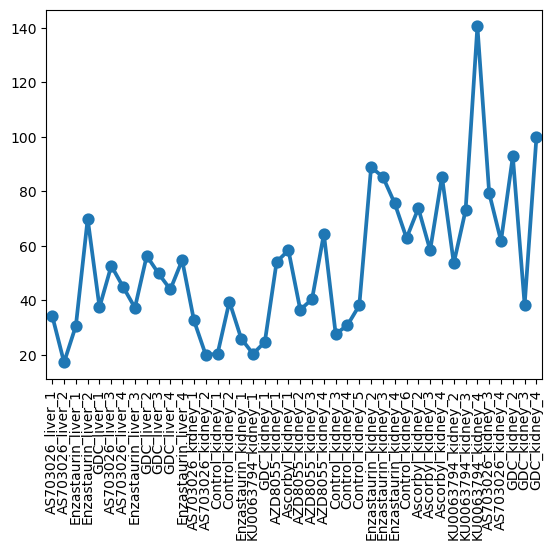

In [46]:
sns.pointplot(treated_mice.expression_df.loc[dream_genes_mouse_measured].mean(axis=0))
_  = plt.xticks(rotation=90)

In [8]:
treated_mice.expression_df

AS703026_liver_1  AS703026_liver_2  Enzastaurin_liver_1  \
Gene ID                                                                       
ENSMUSG00000102693                 0                 0                    0   
ENSMUSG00000064842                 0                 0                    0   
ENSMUSG00000051951                 1                 0                    0   
ENSMUSG00000102851                 0                 0                    0   
ENSMUSG00000103377                 1                 0                    0   
...                              ...               ...                  ...   
ENSMUSG00000064370              8412              4849                 7844   
ENSMUSG00000064371                 1                 0                    2   
ENSMUSG00000064372                 9                 2                    8   
ENSMUSG00000096730                 0                 0                    0   
ENSMUSG00000095742                 0                 0                    0   

                    Enzastaurin_liver_2  GDC_liver_1  AS703026_liver_3  \
Gene ID                                                                  
ENSMUSG00000102693                    0            0                 0   
ENSMUSG00000064842                    0            0                 0   
ENSMUSG00000051951                    0            0                 1   
ENSMUSG00000102851                    0            0                 1   
ENSMUSG00000103377                    0            0                 0   
...                                 ...          ...               ...   
ENSMUSG00000064370                22276        10248             11323   
ENSMUSG00000064371                    7            1                 4   
ENSMUSG00000064372                   13            8                18   
ENSMUSG00000096730                    0            0                 0   
ENSMUSG00000095742                    0            0                 0   

                    AS703026_liver_4  Enzastaurin_liver_3  GDC_liver_2  \
Gene ID                                                                  
ENSMUSG00000102693                 0                    0            0   
ENSMUSG00000064842                 0                    0            0   
ENSMUSG00000051951                 0                    0            0   
ENSMUSG00000102851                 0                    0            0   
ENSMUSG00000103377                 0                    0            0   
...                              ...                  ...          ...   
ENSMUSG00000064370             14033                11602        14558   
ENSMUSG00000064371                 5                    4            2   
ENSMUSG00000064372                18                   16           30   
ENSMUSG00000096730                 0                    0            0   
ENSMUSG00000095742                 0                    0            0   

                    GDC_liver_3  ...  Ascorbyl_kidney_3  Ascorbyl_kidney_4  \
Gene ID                          ...                                         
ENSMUSG00000102693            0  ...                  0                  1   
ENSMUSG00000064842            0  ...                  0                  0   
ENSMUSG00000051951            0  ...                  0                  3   
ENSMUSG00000102851            0  ...                  0                  0   
ENSMUSG00000103377            0  ...                  0                  3   
...                         ...  ...                ...                ...   
ENSMUSG00000064370        16590  ...              54736              62718   
ENSMUSG00000064371            5  ...                  1                  2   
ENSMUSG00000064372           17  ...                 50                 49   
ENSMUSG00000096730            0  ...                  0                  1   
ENSMUSG00000095742            0  ...                  0                  0   

                    KU0063794_kidney_2  KU0063794_k

In [6]:
# create 
hmm = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
fred_again_again_again_palette = ['#000305', '#ff7758', '#f67805', '#d3d3d3', '#565656', '#054fff', '#f9aa74', '#5890ff']
sunset = ['#f3e79b','#fac484','#f8a07e','#eb7f86','#ce6693','#a059a0','#5c53a5']